In [36]:
import pandas as pd
import numpy as np
# import seaborn as sns
import math
# import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
# from matplotlib import colors
# import hydrobr
# import geobr
import geopandas as gpd

In [37]:
plt.style.use("seaborn-v0_8-whitegrid")
plt.rcParams['axes.grid'] = False
plt.rcParams['font.size'] = '10'

In [38]:
def correlation_coefficient_pearson(observed_pr, estimated_pr):
    correlation_matrix = np.corrcoef(observed_pr, estimated_pr)
    correlation_coefficient = correlation_matrix[0, 1]
    return correlation_coefficient

In [39]:
def bias(observed_pr, estimated_pr):
    return np.mean(np.array(estimated_pr) - np.array(observed_pr))

In [40]:
def compound_relative_error(observed_pr, estimated_pr):
    numerator = np.sum((np.array(estimated_pr) - np.array(observed_pr))**2)
    avg_actual = np.mean(observed_pr)
    denominator = np.sum((np.array(observed_pr) - avg_actual)**2)
    cre = (numerator / denominator)
    return cre

In [41]:
def mean_absolute_error(observed_pr, estimated_pr):
    absolute_errors = np.abs(np.array(estimated_pr) - np.array(observed_pr))
    mae = np.mean(absolute_errors)
    return mae

In [42]:
def rmse(observed_pr, estimated_pr):
    return np.sqrt(np.mean((np.array(estimated_pr) - np.array(observed_pr))**2))

In [43]:
def factorCalculate(df):
    a = df['Factor_A'].sum()
    b = df['Factor_B'].sum()
    c = df['Factor_C'].sum()
    d = df['Factor_D'].sum()
    return a, b, c, d

In [44]:
def csiCalculate(a, b, c):
    return a / (a + b + c)

In [45]:
def pcCalculate(a, b, c, d):
    return (a + d) / (a + b + c + d)

# 1961-2024

In [47]:
df = pd.read_hdf('./1 - Organized data gauge/BRAZIL/DATASETS/BRAZIL_DAILY_1961_2024_QC.h5', key = 'table_crossvalidation')
# df = df[df['datetime']>='2021-01-01']
df

,gauge_code,datetime,interpolated_rain_mm,rain_mm
0,00835022,1961-01-01,0.5,0.0
1,02147050,1961-01-01,14.2,1.3
2,02754006,1961-01-01,64.5,46.2
3,01641000,1961-01-01,0.1,0.0
4,01344007,1961-01-01,0.0,21.0
...,...,...,...,...
4563,56776500,2024-12-31,0.0,0.0
4564,58729800,2024-12-31,1.6,0.0
4565,355030860A,2024-12-31,0.8,0.0
4566,350970003A,2024-12-31,1.6,0.6


In [48]:
# Initialize a new column 'wet_days' with zeros
df['wet_days'] = False
df['wet_days_interpolated'] = False

# Calculate 'wet_days' every time 'rain_mm' is greater than 0.5
df.loc[df['rain_mm'] >= 0.5, 'wet_days'] = True
df.loc[df['interpolated_rain_mm'] >= 0.5, 'wet_days_interpolated'] = True

df['Factor_A'] = 0
df.loc[((df['wet_days'] == True) & (df['wet_days_interpolated'] == True)), 'Factor_A'] = 1

df['Factor_B'] = 0
df.loc[((df['wet_days'] == False) & (df['wet_days_interpolated'] == True)), 'Factor_B'] = 1

df['Factor_C'] = 0
df.loc[((df['wet_days'] == True) & (df['wet_days_interpolated'] == False)), 'Factor_C'] = 1

df['Factor_D'] = 0
df.loc[((df['wet_days'] == False) & (df['wet_days_interpolated'] == False)), 'Factor_D'] = 1

In [49]:
df

,gauge_code,datetime,interpolated_rain_mm,rain_mm,wet_days,wet_days_interpolated,Factor_A,Factor_B,Factor_C,Factor_D
0,00835022,1961-01-01,0.5,0.0,False,True,0,1,0,0
1,02147050,1961-01-01,14.2,1.3,True,True,1,0,0,0
2,02754006,1961-01-01,64.5,46.2,True,True,1,0,0,0
3,01641000,1961-01-01,0.1,0.0,False,False,0,0,0,1
4,01344007,1961-01-01,0.0,21.0,True,False,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
4563,56776500,2024-12-31,0.0,0.0,False,False,0,0,0,1
4564,58729800,2024-12-31,1.6,0.0,False,True,0,1,0,0
4565,355030860A,2024-12-31,0.8,0.0,False,True,0,1,0,0
4566,350970003A,2024-12-31,1.6,0.6,True,True,1,0,0,0


# General Statistics

In [50]:
observed_pr = df['rain_mm'].values.tolist()
estimated_pr = df['interpolated_rain_mm'].values.tolist()
correlation_coefficient = correlation_coefficient_pearson(observed_pr, estimated_pr)
rmse_rain_mm = rmse(observed_pr, estimated_pr)
bias_rain_mm = bias(observed_pr, estimated_pr)
cre = compound_relative_error(observed_pr, estimated_pr)
mae = mean_absolute_error(observed_pr, estimated_pr)
a, b, c, d = factorCalculate(df)
csi = csiCalculate(a, b, c)
pc = pcCalculate(a, b, c, d)

print(F"Pearson Correlation Coefficient: {correlation_coefficient:.3f}")
print(f"Bias: {bias_rain_mm:.3f}")
print(f"RMSE: {rmse_rain_mm:.3f}")
print(f"Compound Relative Error (CRE): {cre:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"PC: {pc:.3f}")
print(f"CSI: {csi:.3f}")

Pearson Correlation Coefficient: 0.629
Bias: 0.002
RMSE: 8.559
Compound Relative Error (CRE): 0.640
Mean Absolute Error (MAE): 3.258
PC: 0.791
CSI: 0.517


In [51]:
# 1961 a 2024

# Pearson Correlation Coefficient: 0.623
# Bias: 0.002
# RMSE: 8.635
# Compound Relative Error (CRE): 0.649
# Mean Absolute Error (MAE): 3.246
# PC: 0.791
# CSI: 0.516


# 1960 a 2020

# Pearson Correlation Coefficient: 0.622
# Bias: 0.002
# RMSE: 8.606
# Compound Relative Error (CRE): 0.649
# Mean Absolute Error (MAE): 3.277
# PC: 0.788
# CSI: 0.509


# 2021 a 2024
# Pearson Correlation Coefficient: 0.632
# Bias: 0.006
# RMSE: 9.026
# Compound Relative Error (CRE): 0.652
# Mean Absolute Error (MAE): 2.824
# PC: 0.831
# CSI: 0.604




# R: Pearson Correlation Coefficient

## 1961 to 2024

In [52]:
observed_pr = df['rain_mm']
estimated_pr = df['interpolated_rain_mm']

correlation_coefficient = correlation_coefficient_pearson(observed_pr, estimated_pr)
print("Pearson Correlation Coefficient:", correlation_coefficient)

Pearson Correlation Coefficient: 0.6285400279054346


In [53]:
df_date = df[df['datetime'] == '1961-01-01']

observed_pr = df_date['rain_mm'].values.tolist()
estimated_pr = df_date['interpolated_rain_mm'].values.tolist()

correlation_coefficient = correlation_coefficient_pearson(observed_pr, estimated_pr)
print("Pearson Correlation Coefficient:", correlation_coefficient)

Pearson Correlation Coefficient: 0.48642873877623477


In [54]:
correlation_result = df.groupby('datetime')[['rain_mm', 'interpolated_rain_mm']].corr().iloc[0::2, -1].reset_index()
correlation_result = correlation_result[['datetime', 'interpolated_rain_mm']]
# Rename columns for clarity
correlation_result.columns = ['datetime', 'pearson_correlation']

# Extract the year from the 'datetime' column
correlation_result['year'] = correlation_result['datetime'].dt.year

# Calculate the order of each day within its respective year
correlation_result['day_order'] = correlation_result.groupby('year')['datetime'].rank().astype(int)

correlation_result.sort_values(['year', 'day_order'], inplace=True)

correlation_result

,datetime,pearson_correlation,year,day_order
0,1961-01-01,0.486429,1961,1
1,1961-01-02,0.553116,1961,2
2,1961-01-03,0.504845,1961,3
3,1961-01-04,0.613225,1961,4
4,1961-01-05,0.569102,1961,5
...,...,...,...,...
23371,2024-12-27,0.746882,2024,362
23372,2024-12-28,0.572238,2024,363
23373,2024-12-29,0.380399,2024,364
23374,2024-12-30,0.343774,2024,365


In [55]:
correlation_result.sort_values(['pearson_correlation'])

,datetime,pearson_correlation,year,day_order
22147,2021-08-21,0.015609,2021,233
22148,2021-08-22,0.019736,2021,234
4222,1972-07-24,0.026006,1972,206
12968,1996-07-04,0.032509,1996,186
5645,1976-06-16,0.042619,1976,168
...,...,...,...,...
16313,2005-08-31,0.904767,2005,243
19164,2013-06-21,0.905137,2013,172
13431,1997-10-10,0.905234,1997,283
8566,1984-06-15,0.908506,1984,167


In [ ]:
doy_start = 100 
doy_end = 300

correlation_result_filter = correlation_result[(correlation_result['day_order'] >= doy_start) & (correlation_result['day_order'] < doy_end)]['pearson_correlation']
print("Mean:", correlation_result_filter.mean())
print("Std:", correlation_result_filter.std())
print("Max:", correlation_result_filter.max())
print("Min:", correlation_result_filter.min())

correlation_result_filter = correlation_result[(correlation_result['day_order'] >= doy_end) | (correlation_result['day_order'] < doy_start)]['pearson_correlation']
print("Mean:", correlation_result_filter.mean())
print("Std:", correlation_result_filter.std())
print("Max:", correlation_result_filter.max())
print("Min:", correlation_result_filter.min())

Mean: 0.5393765692664018
Std: 0.15463840485594457
Max: 0.9316709882384633
Min: 0.01560909474409401


In [ ]:
mean_pearson_by_day_order = correlation_result.groupby('day_order')['pearson_correlation'].mean()
mean_pearson_by_day_order.mean()

0.5353475314915089

In [ ]:

print(mean_pearson_by_day_order.loc[doy_start:doy_end].mean(), 
      mean_pearson_by_day_order.loc[doy_start:doy_end].std(), 
      mean_pearson_by_day_order.loc[doy_start:doy_end].min(), 
      mean_pearson_by_day_order.loc[doy_start:doy_end].max())

0.541523527166425 0.026237894927887313 0.4851199130357734 0.5993250243523995


In [113]:
mean_filtered = correlation_result[(correlation_result['day_order'] >= 150) & (correlation_result['day_order'] < 250)]['pearson_correlation'].mean()
print(mean_filtered)

0.541434861205343


In [57]:
correlation_result['pearson_correlation'].mean()

0.5355337581806086

In [58]:
correlation_result['pearson_correlation'].std()

0.1341177310156938

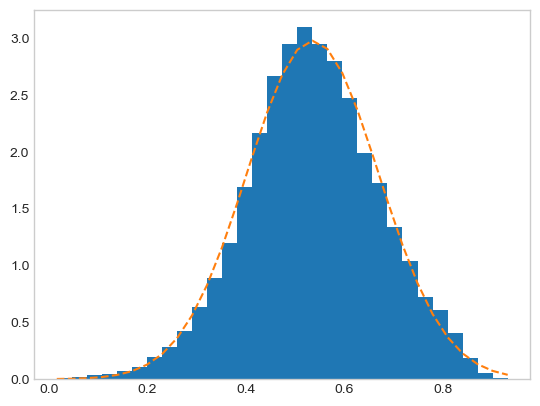

In [59]:
num_bins=30
fig, ax = plt.subplots()
mu = correlation_result['pearson_correlation'].mean()
n, bins, patches = ax.hist(correlation_result['pearson_correlation'], num_bins, density=True)
sigma = std_deviation = correlation_result['pearson_correlation'].std()
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--')

In [60]:
correlation_result['pearson_correlation'].round(3).max()

0.932

In [61]:
pivot_df = correlation_result.pivot_table(index='year', columns='day_order', values='pearson_correlation', aggfunc='first')

# Convert the pivot DataFrame to a NumPy array
correlation_numpy_array = pivot_df.to_numpy()
correlation_numpy_array = np.nan_to_num(correlation_numpy_array)

# Display the NumPy array
correlation_numpy_array

array([[0.48642874, 0.553116  , 0.50484537, ..., 0.54183427, 0.53388395,
        0.        ],
       [0.69763976, 0.41959102, 0.44180184, ..., 0.71076969, 0.65638085,
        0.        ],
       [0.72156467, 0.64567865, 0.38615284, ..., 0.39226308, 0.33649299,
        0.        ],
       ...,
       [0.58449867, 0.46972871, 0.49672195, ..., 0.61263504, 0.60363876,
        0.        ],
       [0.52016125, 0.60374732, 0.40379345, ..., 0.56685199, 0.55679938,
        0.        ],
       [0.64651856, 0.64801284, 0.64763084, ..., 0.38039868, 0.34377409,
        0.49455923]])

## DOY

In [62]:
df_calendar = correlation_result[['datetime', "day_order"]]
df_calendar

,datetime,day_order
0,1961-01-01,1
1,1961-01-02,2
2,1961-01-03,3
3,1961-01-04,4
4,1961-01-05,5
...,...,...
23371,2024-12-27,362
23372,2024-12-28,363
23373,2024-12-29,364
23374,2024-12-30,365


In [63]:
df_merge_doy = pd.merge(df[['datetime', 'rain_mm', 'interpolated_rain_mm']], df_calendar, on = 'datetime')
df_merge_doy['year'] = df_merge_doy['datetime'].dt.year
df_merge_doy

,datetime,rain_mm,interpolated_rain_mm,day_order,year
0,1961-01-01,0.0,0.5,1,1961
1,1961-01-01,1.3,14.2,1,1961
2,1961-01-01,46.2,64.5,1,1961
3,1961-01-01,0.0,0.1,1,1961
4,1961-01-01,21.0,0.0,1,1961
...,...,...,...,...,...
106295710,2024-12-31,0.0,0.0,366,2024
106295711,2024-12-31,0.0,1.6,366,2024
106295712,2024-12-31,0.0,0.8,366,2024
106295713,2024-12-31,0.6,1.6,366,2024


In [64]:
correlation_result_doy = df_merge_doy.groupby('day_order')[['rain_mm', 'interpolated_rain_mm']].corr().iloc[0::2, -1].reset_index()
correlation_result_doy = correlation_result_doy[['day_order', 'interpolated_rain_mm']]

# Rename columns for clarity
correlation_result_doy.columns = ['day_order', 'pearson_correlation']

correlation_result_doy.sort_values(['day_order'], inplace=True)

correlation_result_doy

,day_order,pearson_correlation
0,1,0.579171
1,2,0.601038
2,3,0.628623
3,4,0.610706
4,5,0.605876
...,...,...
361,362,0.574217
362,363,0.593553
363,364,0.579594
364,365,0.542131


## year

In [65]:
df['year'] = df['datetime'].dt.year
correlation_result_year = df.groupby('year')[['rain_mm', 'interpolated_rain_mm']].corr().iloc[0::2, -1].reset_index()
correlation_result_year = correlation_result_year[['year', 'interpolated_rain_mm']]
# Rename columns for clarity
correlation_result_year.columns = ['year', 'pearson_correlation']
correlation_result_year

,year,pearson_correlation
0,1961,0.598543
1,1962,0.597114
2,1963,0.568404
3,1964,0.552390
4,1965,0.585245
...,...,...
59,2020,0.542175
60,2021,0.662058
61,2022,0.674722
62,2023,0.617650


## Chart

In [66]:
x = correlation_result['day_order'].drop_duplicates().values.tolist()
y = correlation_result['year'].drop_duplicates().values.tolist()
z_min, z_max = np.min(correlation_numpy_array), np.max(correlation_numpy_array)
print(x)
print(y)
print(z_min)
print(z_max)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

In [67]:
z_min_doy, z_max_doy = np.min(correlation_result_doy['pearson_correlation'].values.tolist()), np.max(correlation_result_doy['pearson_correlation'].values.tolist())
print(z_min_doy)
print(z_max_doy)

0.5180515215695556
0.7590676375617843


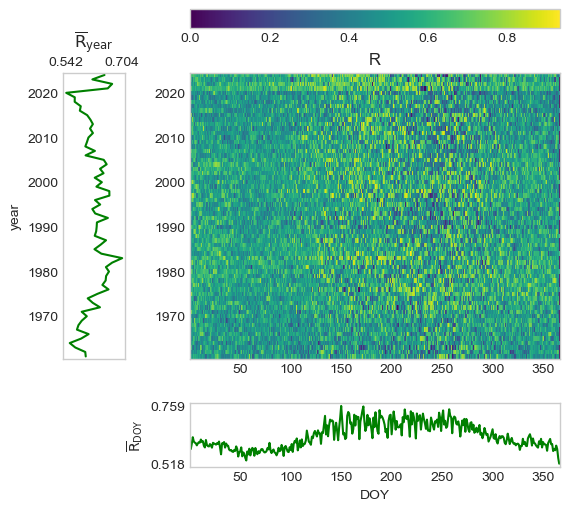

In [68]:
fig = plt.figure(figsize=(5.5,6))
gs = gridspec.GridSpec(3,2, width_ratios=[1,6], height_ratios=[4,9,2])

# Subplot in the top-left (a[0,0])
ax00 = plt.subplot(gs[1, 0])
ax00.plot(correlation_result_year['pearson_correlation'], correlation_result_year['year'], color = 'green')
ax00.xaxis.tick_top()
ax00.set_xticks([round(min(correlation_result_year['pearson_correlation']),3), round(max(correlation_result_year['pearson_correlation']),3)])
ax00.set_xticklabels([min(ax00.get_xticks()), max(ax00.get_xticks())])
ax00.set_title(r'$\overline{\mathrm{R}}_{\text{year}}$')
ax00.set_ylabel(r'year')

# Subplot in the top-right (a[0,1])
ax01 = plt.subplot(gs[1, 1], sharey=ax00)
pcm = ax01.pcolormesh(x, y, correlation_numpy_array, cmap='viridis')
ax01.set_title('R')


# Subplot in the bottom-right (a[1,1])
ax11 = plt.subplot(gs[2, 1], sharex=ax01)
ax11.plot(correlation_result_doy['day_order'], correlation_result_doy['pearson_correlation'], color = 'green')
ax11.set_yticks([round(min(correlation_result_doy['pearson_correlation']),3), round(max(correlation_result_doy['pearson_correlation']),3)])
ax11.set_yticklabels([min(ax11.get_yticks()), max(ax11.get_yticks())])
ax11.set_ylabel(r'$\overline{\mathrm{R}}_{\text{DOY}}$')
ax11.set_xlabel('DOY')

# Subplot in the bottom-left (a[1,0])
ax02 = plt.subplot(gs[0, 1], sharey=ax11)
ax02.set_visible(False)

cbar = plt.colorbar(pcm, ax = ax02, location = 'bottom')

plt.tight_layout(pad = 0.01)
plt.savefig('./figures/cross_validation_R.tiff',  dpi=300, transparent=False, bbox_inches=None)
plt.show()
plt.close()

# BIAS

## 1961 to 2024

In [69]:
observed_pr = df['rain_mm'].values.tolist()
estimated_pr = df['interpolated_rain_mm'].values.tolist()
bias = round(np.mean(np.array(observed_pr) - np.array(estimated_pr)), 4)

# Display the result
print("Bias:", bias)

Bias: -0.002


In [70]:
df_date = df[df['datetime'] == '1961-01-01']

observed_pr = df_date['rain_mm'].values.tolist()
estimated_pr = df_date['interpolated_rain_mm'].values.tolist()
bias = round(np.mean(np.array(observed_pr) - np.array(estimated_pr)), 4)

# Display the result
print("Bias for 1961-01-01:", bias)

Bias for 1961-01-01: -0.015


In [71]:
bias_result = df.groupby('datetime').apply(lambda x: (x['rain_mm'] - x['interpolated_rain_mm']).sum() / len(x)).reset_index()
bias_result.columns = ['datetime', 'Bias']

# Extract the year from the 'datetime' column
bias_result['year'] = bias_result['datetime'].dt.year

# Calculate the order of each day within its respective year
bias_result['day_order'] = bias_result.groupby('year')['datetime'].rank().astype(int)

bias_result.sort_values(['year', 'day_order'], inplace=True)

bias_result

C:\Users\linde\AppData\Local\Temp\ipykernel_17160\1781646571.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  bias_result = df.groupby('datetime').apply(lambda x: (x['rain_mm'] - x['interpolated_rain_mm']).sum() / len(x)).reset_index()


,datetime,Bias,year,day_order
0,1961-01-01,-0.015002,1961,1
1,1961-01-02,-0.043869,1961,2
2,1961-01-03,0.165078,1961,3
3,1961-01-04,-0.270294,1961,4
4,1961-01-05,0.092815,1961,5
...,...,...,...,...
23371,2024-12-27,-0.030630,2024,362
23372,2024-12-28,-0.110379,2024,363
23373,2024-12-29,0.025799,2024,364
23374,2024-12-30,-0.023524,2024,365


In [72]:
print(bias_result['Bias'].mean(), bias_result['Bias'].std())

-0.0022856373288667733 0.05787700796547066


In [73]:
bias_result['Bias'].min()

-0.3657722987672226

In [74]:
bias_result['Bias'].max()

0.4114551083591332

-0.0022856373288667733 -0.3658 0.4115


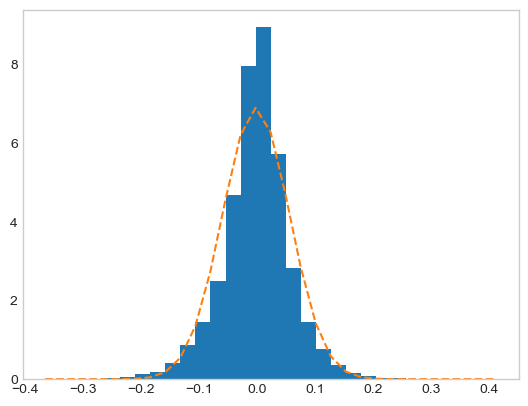

In [75]:
num_bins=30
fig, ax = plt.subplots()
mu = bias_result['Bias'].mean()
n, bins, patches = ax.hist(bias_result['Bias'], num_bins, density=True)
sigma = std_deviation = bias_result['Bias'].std()
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--')
print(bias_result['Bias'].mean(), bias_result['Bias'].round(4).min(), bias_result['Bias'].round(4).max())

In [76]:
pivot_df = bias_result.pivot_table(index='year', columns='day_order', values='Bias', aggfunc='first')

# Convert the pivot DataFrame to a NumPy array
bias_numpy_array = pivot_df.to_numpy()
bias_numpy_array = np.nan_to_num(bias_numpy_array)

print(len(bias_numpy_array), len(bias_numpy_array[0]), len(bias_numpy_array) * len(bias_numpy_array[0]))
bias_numpy_array

64 366 23424


array([[-0.01500173, -0.04386874,  0.16507772, ..., -0.11929945,
         0.08523352,  0.        ],
       [-0.14777813,  0.11663516, -0.09634531, ..., -0.03949184,
        -0.12851317,  0.        ],
       [-0.09748565, -0.15818082,  0.04143677, ..., -0.05984787,
         0.03374116,  0.        ],
       ...,
       [-0.11354208, -0.01374152,  0.06816188, ...,  0.04793076,
        -0.02247213,  0.        ],
       [-0.00318497, -0.0737196 , -0.00418972, ..., -0.0856513 ,
         0.01269331,  0.        ],
       [-0.15832288, -0.24249061, -0.16391667, ...,  0.02579879,
        -0.02352431,  0.05805604]])

## DOY

In [77]:
bias_result_doy = df_merge_doy.copy(deep=True)
bias_result_doy = bias_result_doy.groupby('day_order').apply(lambda x: (x['rain_mm'] - x['interpolated_rain_mm']).sum() / len(x)).reset_index()

# Rename columns for clarity
bias_result_doy.columns = ['day_order', 'Bias']
bias_result_doy.sort_values(['day_order'], inplace=True)

bias_result_doy

C:\Users\linde\AppData\Local\Temp\ipykernel_17160\1388580973.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  bias_result_doy = bias_result_doy.groupby('day_order').apply(lambda x: (x['rain_mm'] - x['interpolated_rain_mm']).sum() / len(x)).reset_index()


,day_order,Bias
0,1,0.001815
1,2,-0.000872
2,3,0.002290
3,4,0.000397
4,5,-0.013784
...,...,...
361,362,-0.007887
362,363,-0.027614
363,364,-0.012645
364,365,-0.001607


In [78]:
z_min_doy, z_max_doy = np.min(bias_result_doy['Bias'].values.tolist()), np.max(bias_result_doy['Bias'].values.tolist())
print(z_min_doy)
print(z_max_doy)

-0.029804218422048653
0.018150207905570637


## year

In [79]:
bias_result_year = df_merge_doy.copy(deep=True)
bias_result_year = bias_result_year.groupby('year').apply(lambda x: (x['rain_mm'] - x['interpolated_rain_mm']).sum() / len(x)).reset_index()
bias_result_year.columns = ['year', 'Bias']
bias_result_year

C:\Users\linde\AppData\Local\Temp\ipykernel_17160\3560072139.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  bias_result_year = bias_result_year.groupby('year').apply(lambda x: (x['rain_mm'] - x['interpolated_rain_mm']).sum() / len(x)).reset_index()


,year,Bias
0,1961,-0.006550
1,1962,-0.010316
2,1963,-0.014022
3,1964,-0.017379
4,1965,-0.008506
...,...,...
59,2020,-0.004924
60,2021,-0.011195
61,2022,0.005998
62,2023,-0.005453


In [80]:
z_min_year, z_max_year = np.min(bias_result_year['Bias'].values.tolist()), np.max(bias_result_year['Bias'].values.tolist())
print(z_min_year)
print(z_max_year)

-0.017378939446075048
0.013096790781676157


## Chart

In [81]:
x = bias_result['day_order'].drop_duplicates().values.tolist()
y = bias_result['year'].drop_duplicates().values.tolist()
z_min, z_max = np.min(bias_numpy_array), np.max(bias_numpy_array)
print(x)
print(y)
print(z_min)
print(z_max)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

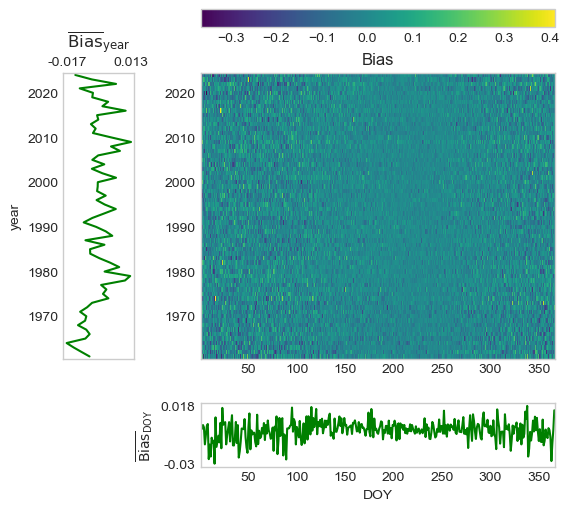

In [82]:
fig = plt.figure(figsize=(5.5,6))
gs = gridspec.GridSpec(3,2, width_ratios=[2,10], height_ratios=[4,9,2])

# Subplot in the top-left (a[0,0])
ax00 = plt.subplot(gs[1, 0])
ax00.plot(bias_result_year['Bias'], bias_result_year['year'], color = 'green')
ax00.xaxis.tick_top()
ax00.set_xticks([round(z_min_year, 3), round(z_max_year, 3)])
ax00.set_xticklabels([min(ax00.get_xticks()), max(ax00.get_xticks())])
ax00.set_title(r'$\overline{\mathrm{Bias}}_{\text{year}}$')
ax00.set_ylabel(r'year')

# Subplot in the top-right (a[0,1])
ax01 = plt.subplot(gs[1, 1], sharey=ax00)
pcm = ax01.pcolormesh(x, y, bias_numpy_array, cmap='viridis')
ax01.set_title('Bias')


# Subplot in the bottom-right (a[1,1])
ax11 = plt.subplot(gs[2, 1], sharex=ax01)
ax11.plot(bias_result_doy['day_order'], bias_result_doy['Bias'], color = 'green')
ax11.set_yticks([round(z_min_doy, 3), round(z_max_doy, 3)])
ax11.set_yticklabels([min(ax11.get_yticks()), max(ax11.get_yticks())])
ax11.set_ylabel(r'$\overline{\mathrm{Bias}}_{\text{DOY}}$')
ax11.set_xlabel('DOY')

# Subplot in the bottom-left (a[1,0])
ax02 = plt.subplot(gs[0, 1], sharey=ax11)
ax02.set_visible(False)

cbar = plt.colorbar(pcm, ax = ax02, location = 'bottom')
plt.tight_layout(pad = 0.01)
plt.savefig('./figures/cross_validation_Bias.tiff', format='tiff', dpi=300, transparent=False, bbox_inches=None)
plt.show()
plt.close()

# RMSE

## 1961 to 2020

In [83]:
observed_pr = df['rain_mm'].values.tolist()
estimated_pr = df['interpolated_rain_mm'].values.tolist()
rmse = round(np.sqrt(np.mean((np.array(observed_pr) - np.array(estimated_pr))**2)), 3)

# Display the result
print("RMSE:", rmse)

RMSE: 8.559


In [84]:
df_date = df[df['datetime'] == '1961-01-01']

observed_pr = df_date['rain_mm'].values.tolist()
estimated_pr = df_date['interpolated_rain_mm'].values.tolist()
rmse = round(np.sqrt(np.mean((np.array(observed_pr) - np.array(estimated_pr))**2)), 3)

# Display the result
print("RMSE for 1961-01-01:", rmse)

RMSE for 1961-01-01: 15.054


In [85]:
rmse_result = df.groupby('datetime').apply(lambda x: np.sqrt(np.mean((np.array(x['rain_mm']) - np.array(x['interpolated_rain_mm']))**2))).reset_index()
rmse_result.columns = ['datetime', 'RMSE']

# Extract the year from the 'datetime' column
rmse_result['year'] = rmse_result['datetime'].dt.year

# Calculate the order of each day within its respective year
rmse_result['day_order'] = rmse_result.groupby('year')['datetime'].rank().astype(int)

rmse_result.sort_values(['year', 'day_order'], inplace=True)

rmse_result

C:\Users\linde\AppData\Local\Temp\ipykernel_17160\562509079.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  rmse_result = df.groupby('datetime').apply(lambda x: np.sqrt(np.mean((np.array(x['rain_mm']) - np.array(x['interpolated_rain_mm']))**2))).reset_index()


,datetime,RMSE,year,day_order
0,1961-01-01,15.054255,1961,1
1,1961-01-02,15.414044,1961,2
2,1961-01-03,14.319672,1961,3
3,1961-01-04,14.036500,1961,4
4,1961-01-05,12.061286,1961,5
...,...,...,...,...
23371,2024-12-27,11.428714,2024,362
23372,2024-12-28,9.143879,2024,363
23373,2024-12-29,15.562787,2024,364
23374,2024-12-30,13.876264,2024,365


In [ ]:
doy_start = 100 
doy_end = 300
# RMSE result for the dry season
rmse_result_filter = rmse_result[(rmse_result['day_order'] >= doy_start) & (rmse_result['day_order'] < doy_end)]['RMSE']
print("Mean:", rmse_result_filter.mean())
print("Std:", rmse_result_filter.std())
print("Max:", rmse_result_filter.max())
print("Min:", rmse_result_filter.min())
# RMSE result for the wet season
rmse_result_filter = rmse_result[(rmse_result['day_order'] >= doy_end) | (rmse_result['day_order'] < doy_start)]['RMSE']
print("Mean:", rmse_result_filter.mean())
print("Std:", rmse_result_filter.std())
print("Max:", rmse_result_filter.max())
print("Min:", rmse_result_filter.min())

Mean: 6.034595466966496
Std: 2.4998111676246086
Max: 23.1280250986714
Min: 0.8845398319384574
Mean: 10.289793669461837
Std: 2.3633144861777327
Max: 22.452356835586937
Min: 2.7488901366191265


In [86]:
rmse_result['RMSE'].mean()

7.9597741198408425

In [87]:
rmse_result['RMSE'].std()   

3.230228586666535

In [88]:
rmse_result['RMSE'].min()

0.8845398319384574

In [89]:
rmse_result['RMSE'].max()

23.1280250986714

7.9597741198408425 0.885 23.128


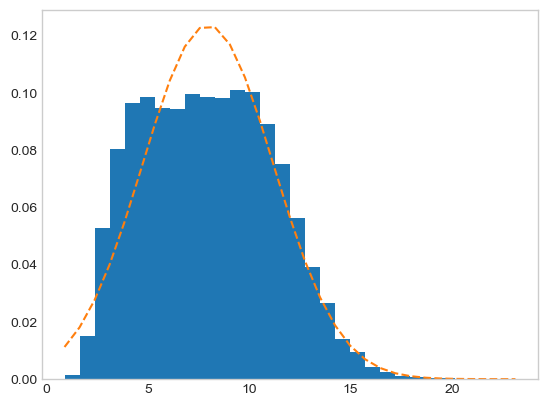

In [90]:
num_bins=30
fig, ax = plt.subplots()
mu = rmse_result['RMSE'].mean()
n, bins, patches = ax.hist(rmse_result['RMSE'], num_bins, density=True)
sigma = std_deviation = rmse_result['RMSE'].std()
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--')
print(rmse_result['RMSE'].mean(), rmse_result['RMSE'].round(3).min(), rmse_result['RMSE'].round(3).max())

In [91]:
pivot_df = rmse_result.pivot_table(index='year', columns='day_order', values='RMSE', aggfunc='first')

# Convert the pivot DataFrame to a NumPy array
rmse_numpy_array = pivot_df.to_numpy()
rmse_numpy_array = np.nan_to_num(rmse_numpy_array)

# Display the NumPy array
print(len(rmse_numpy_array), len(rmse_numpy_array[0]), len(rmse_numpy_array) * len(rmse_numpy_array[0]))
rmse_numpy_array

64 366 23424


array([[15.05425469, 15.41404379, 14.31967172, ..., 11.8628463 ,
         8.88816389,  0.        ],
       [ 7.22302125,  7.28617607,  9.9166641 , ..., 13.75098958,
        14.25656236,  0.        ],
       [12.77588269, 10.62347066,  7.27136455, ..., 11.3464473 ,
        12.25546598,  0.        ],
       ...,
       [11.34888074, 12.26673332, 16.64027194, ..., 10.8183354 ,
         9.34629927,  0.        ],
       [ 8.61632649, 11.54861448, 14.266826  , ..., 10.7915108 ,
         9.94448458,  0.        ],
       [12.06446828, 11.65180151, 13.23786976, ..., 15.56278699,
        13.87626355,  8.38953694]])

## DOY

In [92]:
rmse_result_doy = df_merge_doy.copy(deep=True)
rmse_result_doy = rmse_result_doy.groupby('day_order').apply(lambda x: np.sqrt(np.mean((np.array(x['rain_mm']) - np.array(x['interpolated_rain_mm']))**2))).reset_index()

# Rename columns for clarity
rmse_result_doy.columns = ['day_order', 'RMSE']
rmse_result_doy.sort_values(['day_order'], inplace=True)

rmse_result_doy

C:\Users\linde\AppData\Local\Temp\ipykernel_17160\2630438679.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  rmse_result_doy = rmse_result_doy.groupby('day_order').apply(lambda x: np.sqrt(np.mean((np.array(x['rain_mm']) - np.array(x['interpolated_rain_mm']))**2))).reset_index()


,day_order,RMSE
0,1,10.900119
1,2,11.273607
2,3,11.153488
3,4,11.071993
4,5,10.859488
...,...,...
361,362,10.982592
362,363,10.762751
363,364,10.809529
364,365,11.082316


In [93]:
z_min_doy, z_max_doy = np.min(rmse_result_doy['RMSE'].values.tolist()), np.max(rmse_result_doy['RMSE'].values.tolist())
print(z_min_doy)
print(z_max_doy)

3.9504141964675252
11.83108799963647


## year

In [94]:
rmse_result_year = df_merge_doy.copy(deep=True)
rmse_result_year = rmse_result_year.groupby('year').apply(lambda x: np.sqrt(np.mean((np.array(x['rain_mm']) - np.array(x['interpolated_rain_mm']))**2))).reset_index()
rmse_result_year.columns = ['year', 'RMSE']
rmse_result_year.tail(10)

C:\Users\linde\AppData\Local\Temp\ipykernel_17160\4197010518.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  rmse_result_year = rmse_result_year.groupby('year').apply(lambda x: np.sqrt(np.mean((np.array(x['rain_mm']) - np.array(x['interpolated_rain_mm']))**2))).reset_index()


,year,RMSE
54,2015,8.877013
55,2016,9.001526
56,2017,9.112809
57,2018,9.061639
58,2019,8.909522
59,2020,9.935730
60,2021,8.180007
61,2022,8.718336
62,2023,9.033025
63,2024,8.853221


In [95]:
z_min_year, z_max_year = np.min(rmse_result_year['RMSE'].values.tolist()), np.max(rmse_result_year['RMSE'].values.tolist())
print(z_min_year)
print(z_max_year)

7.852590366561985
9.935730259530425


## Chart

In [96]:
x = rmse_result['day_order'].drop_duplicates().values.tolist()
y = rmse_result['year'].drop_duplicates().values.tolist()
z_min, z_max = np.min(rmse_numpy_array), np.max(rmse_numpy_array)
print(x)
print(y)
print(z_min)
print(z_max)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

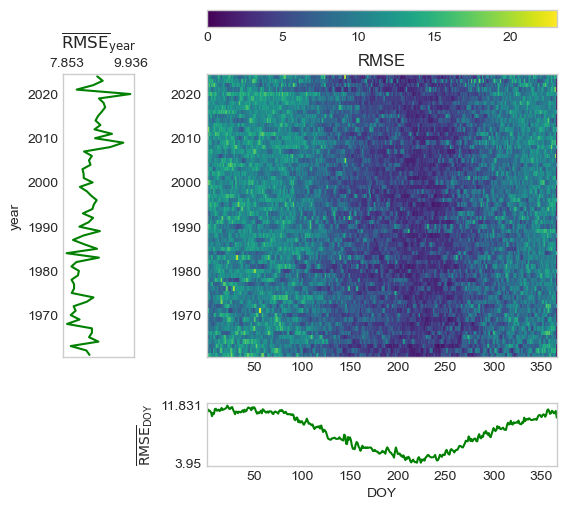

In [97]:
fig = plt.figure(figsize=(5.5,6))
gs = gridspec.GridSpec(3,2, width_ratios=[2,10], height_ratios=[4,9,2])

# Subplot in the top-left (a[0,0])
ax00 = plt.subplot(gs[1, 0])
ax00.plot(rmse_result_year['RMSE'], rmse_result_year['year'], color = 'green')
ax00.xaxis.tick_top()
ax00.set_xticks([round(z_min_year, 3), round(z_max_year, 3)])
ax00.set_xticklabels([min(ax00.get_xticks()), max(ax00.get_xticks())])
ax00.set_title(r'$\overline{\mathrm{RMSE}}_{\text{year}}$')
ax00.set_ylabel(r'year')

# Subplot in the top-right (a[0,1])
ax01 = plt.subplot(gs[1, 1], sharey=ax00)
pcm = ax01.pcolormesh(x, y, rmse_numpy_array, cmap='viridis')
ax01.set_title('RMSE')



# Subplot in the bottom-right (a[1,1])
ax11 = plt.subplot(gs[2, 1], sharex=ax01)
ax11.plot(rmse_result_doy['day_order'], rmse_result_doy['RMSE'], color = 'green')
ax11.set_yticks([round(z_min_doy, 3), round(z_max_doy, 3)])
ax11.set_yticklabels([min(ax11.get_yticks()), max(ax11.get_yticks())])
ax11.set_ylabel(r'$\overline{\mathrm{RMSE}}_{\text{DOY}}$')
ax11.set_xlabel('DOY')

# Subplot in the bottom-left (a[1,0])
ax02 = plt.subplot(gs[0, 1], sharey=ax11)
ax02.set_visible(False)

cbar = plt.colorbar(pcm, ax = ax02, location = 'bottom')

plt.tight_layout(pad = 0.1)
plt.savefig('./figures/cross_validation_RMSE.tiff', dpi=300, transparent=False, bbox_inches=None)
plt.show()
plt.close()

# Combined Metrics

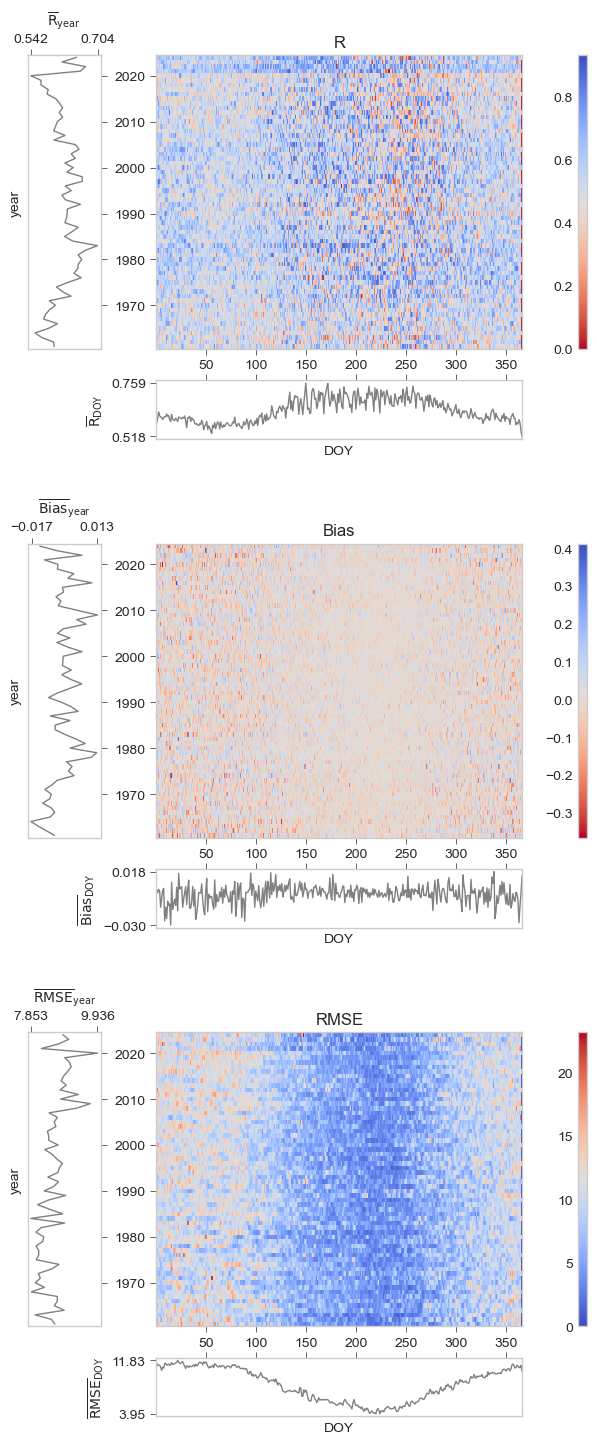

In [98]:
# Create figure with 3 rows (one for each metric)
fig = plt.figure(figsize=(5.5, 15))  # Slightly wider figure to accommodate the colorbar
gs_main = gridspec.GridSpec(3, 1)  # 3 rows, 1 column for metrics

# Rename columns to match metric names
correlation_result_year = correlation_result_year.rename(columns={'pearson_correlation': 'R'})
correlation_result_doy = correlation_result_doy.rename(columns={'pearson_correlation': 'R'})

# Define metrics (replace with your data)
metrics = [
    {'name': 'R', 'result_year': correlation_result_year, 'result_doy': correlation_result_doy, 'array': correlation_numpy_array},
    {'name': 'Bias', 'result_year': bias_result_year, 'result_doy': bias_result_doy, 'array': bias_numpy_array},
    {'name': 'RMSE', 'result_year': rmse_result_year, 'result_doy': rmse_result_doy, 'array': rmse_numpy_array}
]

cmap = ['coolwarm_r', 'coolwarm_r', 'coolwarm']

for i, metric in enumerate(metrics):

    z_min_doy, z_max_doy = np.min(metric['result_doy'][metric['name']].values.tolist()), np.max(metric['result_doy'][metric['name']].values.tolist())
    z_min_year, z_max_year = np.min(metric['result_year'][metric['name']].values.tolist()), np.max(metric['result_year'][metric['name']].values.tolist())

    # Create nested GridSpec for each metric (3 rows, 3 columns)
    # Column 0: Year plot (left)
    # Column 1: Heatmap (middle)
    # Column 2: Colorbar (right)
    gs_sub = gridspec.GridSpecFromSubplotSpec(
        3, 3,  # 3 rows, 3 columns
        subplot_spec=gs_main[i],  # Assign to current metric row
        width_ratios=[2, 10, 0.25],  # Adjust width ratios: more space for heatmap, less for colorbar
        height_ratios=[4, 10, 2],  # Keep height ratios the same
        wspace=0.37,  # Increase horizontal spacing between subplots
        hspace=0.2   # Increase vertical spacing between subplots
    )

    # Year plot (left)
    ax_left = fig.add_subplot(gs_sub[1, 0])
    ax_left.plot(metric['result_year'][metric['name']]
                 , metric['result_year']['year']
                 , color='grey'
                 , linewidth = 1)
    ax_left.xaxis.tick_top()
    ax_left.set_xticks([round(z_min_year, 3), round(z_max_year, 3)])
    ax_left.tick_params(axis='y', which='both', left=False, right=True, labelleft=False, labelright=False, length=4, width=0.5)
    ax_left.tick_params(axis='x', which='both', bottom=False, top=True, labelbottom=False, labeltop=True, length=4, width=0.5)
    ax_left.set_title(fr'$\overline{{\mathrm{{{metric["name"]}}}}}_{{\text{{year}}}}$', fontsize = 10)
    ax_left.set_ylabel('year')

    # Main heatmap (middle)
    ax_main = fig.add_subplot(gs_sub[1, 1], sharey=ax_left)
    pcm = ax_main.pcolormesh(x, y, metric['array'], cmap=cmap[i])
    ax_main.set_title(metric['name'])
    # Ensure ticks are shown on both axes
    ax_main.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True, length=4, width=0.5)
    ax_main.tick_params(axis='y', which='both', left=True, right=False, labelleft=True, labelright=False, length=4, width=0.5)

    # DOY plot (bottom)
    ax_bottom = fig.add_subplot(gs_sub[2, 1], sharex=ax_main)
    ax_bottom.plot(metric['result_doy']['day_order']
                   , metric['result_doy'][metric['name']]
                   , color='grey'
                   , linewidth = 1)
    ax_bottom.set_yticks([round(z_min_doy, 3), round(z_max_doy, 3)])
    ax_bottom.set_ylabel(fr'$\overline{{\mathrm{{{metric["name"]}}}}}_{{\text{{DOY}}}}$')
    ax_bottom.tick_params(axis='x', which='both', bottom=False, top=True, labelbottom = False, labeltop=False, length=4, width=0.5)
    ax_bottom.tick_params(axis='y', which='both', left=True, right=False, labelleft=True, labelright=False, length=4, width=0.5)
    ax_bottom.set_xlabel('DOY')



    # Colorbar (right)
    ax_cbar = fig.add_subplot(gs_sub[1, 2])  # Place colorbar in the right column
    cbar = plt.colorbar(pcm, cax=ax_cbar, location = 'left')  # Add colorbar to the right of the heatmap
    # cbar.set_label(metric['name'])  # Add a label to the colorbar

# Adjust layout with more padding
plt.tight_layout(pad=-1)  # Increase padding around the subplots
plt.savefig('./figures/crossvalidationstacked_metrics.tiff', dpi=300, bbox_inches='tight')
plt.show()

C:\Users\linde\AppData\Local\Temp\ipykernel_17160\1220942342.py:77: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=2)  # Increase padding around the subplots


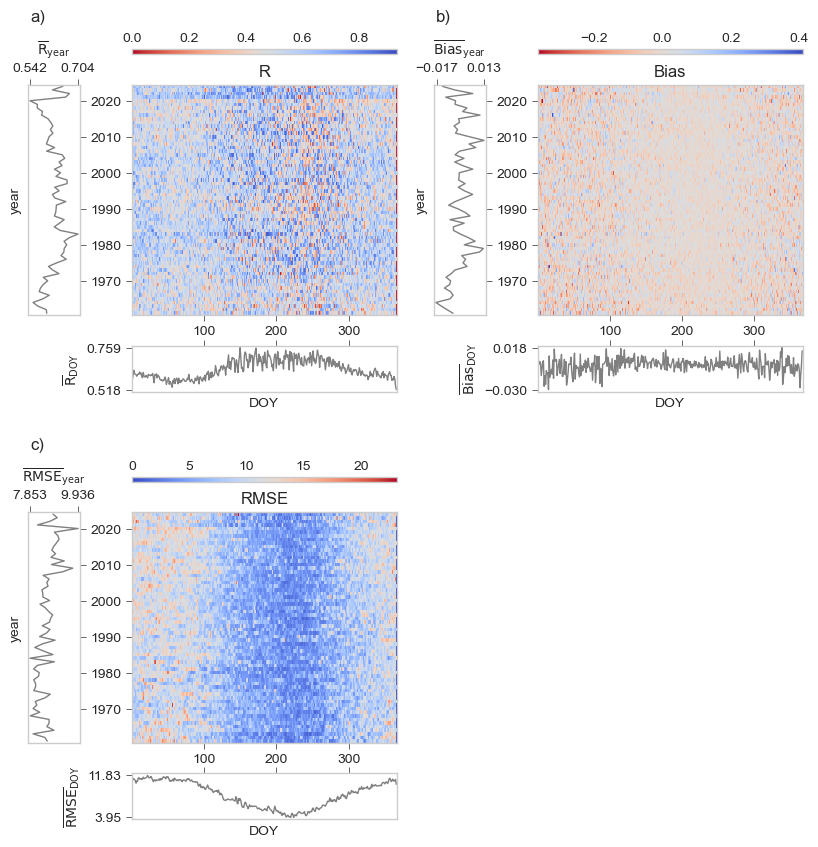

In [99]:
# Create figure with 2 rows and 2 columns
fig = plt.figure(figsize=(10, 10))  # Adjust figure size for 2x2 layout
gs_main = gridspec.GridSpec(2, 2, wspace=0.1, hspace=0.25)  # 2 rows, 2 columns for metrics

# Rename columns to match metric names
correlation_result_year = correlation_result_year.rename(columns={'pearson_correlation': 'R'})
correlation_result_doy = correlation_result_doy.rename(columns={'pearson_correlation': 'R'})

# Define metrics (replace with your data)
metrics = [
    {'name': 'R', 'result_year': correlation_result_year, 'result_doy': correlation_result_doy, 'array': correlation_numpy_array},
    {'name': 'Bias', 'result_year': bias_result_year, 'result_doy': bias_result_doy, 'array': bias_numpy_array},
    {'name': 'RMSE', 'result_year': rmse_result_year, 'result_doy': rmse_result_doy, 'array': rmse_numpy_array}
]

cmap = ['coolwarm_r', 'coolwarm_r', 'coolwarm']
letters = ['a', 'b', 'c']

for i, metric in enumerate(metrics):
    z_min_doy, z_max_doy = np.min(metric['result_doy'][metric['name']].values.tolist()), np.max(metric['result_doy'][metric['name']].values.tolist())
    z_min_year, z_max_year = np.min(metric['result_year'][metric['name']].values.tolist()), np.max(metric['result_year'][metric['name']].values.tolist())

    # Create nested GridSpec for each metric (3 rows, 3 columns)
    # Column 0: Year plot (left)
    # Column 1: Heatmap (middle)
    # Column 2: Colorbar (right)
    gs_sub = gridspec.GridSpecFromSubplotSpec(
        3, 2,  # 3 rows, 3 columns
        subplot_spec=gs_main[i // 2, i % 2],  # Assign to current metric position in 2x2 grid
        width_ratios=[2, 10],  # Adjust width ratios: more space for heatmap, less for colorbar
        height_ratios=[0.2, 10, 2],  # Keep height ratios the same
        wspace=0.325,  # Increase horizontal spacing between subplots
        hspace=0.325   # Increase vertical spacing between subplots
    )

    # Year plot (left)
    ax_left = fig.add_subplot(gs_sub[1, 0])
    ax_left.plot(metric['result_year'][metric['name']]
                 , metric['result_year']['year']
                 , color='grey'
                 , linewidth=1)
    ax_left.xaxis.tick_top()
    ax_left.set_xticks([round(z_min_year, 3), round(z_max_year, 3)])
    ax_left.tick_params(axis='y', which='both', left=False, right=True, labelleft=False, labelright=False, length=4, width=0.5)
    ax_left.tick_params(axis='x', which='both', bottom=False, top=True, labelbottom=False, labeltop=True, length=4, width=0.5)
    ax_left.set_title(fr'$\overline{{\mathrm{{{metric["name"]}}}}}_{{\text{{year}}}}$', fontsize=10)
    ax_left.set_ylabel('year')

    # Main heatmap (middle)
    ax_main = fig.add_subplot(gs_sub[1, 1], sharey=ax_left)
    pcm = ax_main.pcolormesh(x, y, metric['array'], cmap=cmap[i])
    ax_main.set_title(metric['name'])
    # Ensure ticks are shown on both axes
    ax_main.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True, length=4, width=0.5)
    ax_main.tick_params(axis='y', which='both', left=True, right=False, labelleft=True, labelright=False, length=4, width=0.5)

    # DOY plot (bottom)
    ax_bottom = fig.add_subplot(gs_sub[2, 1], sharex=ax_main)
    ax_bottom.plot(metric['result_doy']['day_order']
                   , metric['result_doy'][metric['name']]
                   , color='grey'
                   , linewidth=1)
    ax_bottom.set_yticks([round(z_min_doy, 3), round(z_max_doy, 3)])
    ax_bottom.set_ylabel(fr'$\overline{{\mathrm{{{metric["name"]}}}}}_{{\text{{DOY}}}}$')
    ax_bottom.tick_params(axis='x', which='both', bottom=False, top=True, labelbottom=False, labeltop=False, length=4, width=0.5)
    ax_bottom.tick_params(axis='y', which='both', left=True, right=False, labelleft=True, labelright=False, length=4, width=0.5)
    ax_bottom.set_xlabel('DOY')

        # Add letter annotation in the top-left corner
    ax_left.text(min(metric['result_year'][metric['name']]), 2042, f"{letters[i]})", fontsize=12)

    # Colorbar (right)
    ax_cbar = fig.add_subplot(gs_sub[0, 1])  # Place colorbar in the right column
    cbar = plt.colorbar(pcm, cax=ax_cbar, orientation = 'horizontal', location='top')  # Add colorbar to the right of the heatmap

# Adjust layout with more padding
plt.tight_layout(pad=2)  # Increase padding around the subplots
plt.savefig('./figures/crossvalidation_stacked_metrics_2_by_2.tiff', dpi=300, bbox_inches='tight')
plt.show()

C:\Users\linde\AppData\Local\Temp\ipykernel_17160\4122851565.py:143: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=2)  # Increase padding around the subplots


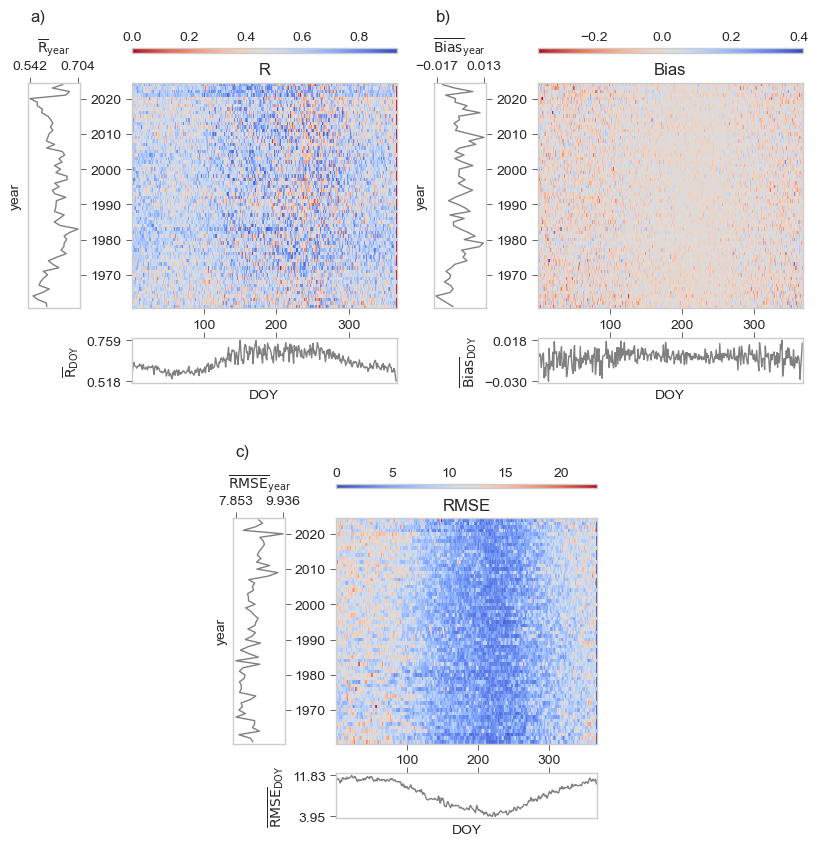

In [100]:
# Create figure with 2 rows and 1 column
fig = plt.figure(figsize=(10, 10))  # Adjust figure size for 1x2 layout
gs_main = gridspec.GridSpec(2, 1, hspace=0.3)  # 2 rows, 1 column

# Rename columns to match metric names
correlation_result_year = correlation_result_year.rename(columns={'pearson_correlation': 'R'})
correlation_result_doy = correlation_result_doy.rename(columns={'pearson_correlation': 'R'})

# Define metrics (replace with your data)
metrics = [
    {'name': 'R', 'result_year': correlation_result_year, 'result_doy': correlation_result_doy, 'array': correlation_numpy_array},
    {'name': 'Bias', 'result_year': bias_result_year, 'result_doy': bias_result_doy, 'array': bias_numpy_array},
    {'name': 'RMSE', 'result_year': rmse_result_year, 'result_doy': rmse_result_doy, 'array': rmse_numpy_array}
]

cmap = ['coolwarm_r', 'coolwarm_r', 'coolwarm']
letters = ['a', 'b', 'c']

# First row: R and Bias side by side
gs_row1 = gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=gs_main[0], wspace=0.1)

for i, metric in enumerate(metrics[:2]):  # Only plot R and Bias in the first row
    z_min_doy, z_max_doy = np.min(metric['result_doy'][metric['name']].values.tolist()), np.max(metric['result_doy'][metric['name']].values.tolist())
    z_min_year, z_max_year = np.min(metric['result_year'][metric['name']].values.tolist()), np.max(metric['result_year'][metric['name']].values.tolist())

    # Create nested GridSpec for each metric (3 rows, 2 columns)
    gs_sub = gridspec.GridSpecFromSubplotSpec(
        3, 2,  # 3 rows, 2 columns
        subplot_spec=gs_row1[i],  # Assign to current metric position in the first row
        width_ratios=[2, 10],  # Adjust width ratios: more space for heatmap, less for colorbar
        height_ratios=[0.2, 10, 2],  # Keep height ratios the same
        wspace=0.325,  # Increase horizontal spacing between subplots
        hspace=0.325   # Increase vertical spacing between subplots
    )

    # Year plot (left)
    ax_left = fig.add_subplot(gs_sub[1, 0])
    ax_left.plot(metric['result_year'][metric['name']]
                 , metric['result_year']['year']
                 , color='grey'
                 , linewidth=1)
    ax_left.xaxis.tick_top()
    ax_left.set_xticks([round(z_min_year, 3), round(z_max_year, 3)])
    ax_left.tick_params(axis='y', which='both', left=False, right=True, labelleft=False, labelright=False, length=4, width=0.5)
    ax_left.tick_params(axis='x', which='both', bottom=False, top=True, labelbottom=False, labeltop=True, length=4, width=0.5)
    ax_left.set_title(fr'$\overline{{\mathrm{{{metric["name"]}}}}}_{{\text{{year}}}}$', fontsize=10)
    ax_left.set_ylabel('year')

    # Main heatmap (middle)
    ax_main = fig.add_subplot(gs_sub[1, 1], sharey=ax_left)
    pcm = ax_main.pcolormesh(x, y, metric['array'], cmap=cmap[i])
    ax_main.set_title(metric['name'])
    # Ensure ticks are shown on both axes
    ax_main.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True, length=4, width=0.5)
    ax_main.tick_params(axis='y', which='both', left=True, right=False, labelleft=True, labelright=False, length=4, width=0.5)

    # DOY plot (bottom)
    ax_bottom = fig.add_subplot(gs_sub[2, 1], sharex=ax_main)
    ax_bottom.plot(metric['result_doy']['day_order']
                   , metric['result_doy'][metric['name']]
                   , color='grey'
                   , linewidth=1)
    ax_bottom.set_yticks([round(z_min_doy, 3), round(z_max_doy, 3)])
    ax_bottom.set_ylabel(fr'$\overline{{\mathrm{{{metric["name"]}}}}}_{{\text{{DOY}}}}$')
    ax_bottom.tick_params(axis='x', which='both', bottom=False, top=True, labelbottom=False, labeltop=False, length=4, width=0.5)
    ax_bottom.tick_params(axis='y', which='both', left=True, right=False, labelleft=True, labelright=False, length=4, width=0.5)
    ax_bottom.set_xlabel('DOY')

    # Add letter annotation in the top-left corner
    ax_left.text(min(metric['result_year'][metric['name']]), 2042, f"{letters[i]})", fontsize=12)

    # Colorbar (right)
    ax_cbar = fig.add_subplot(gs_sub[0, 1])  # Place colorbar in the right column
    cbar = plt.colorbar(pcm, cax=ax_cbar, orientation='horizontal', location='top')  # Add colorbar to the right of the heatmap

# Second row: Divide into three columns with RMSE in the middle
gs_row2 = gridspec.GridSpecFromSubplotSpec(1, 3, subplot_spec=gs_main[1], width_ratios=[1, 2, 1], wspace=0.1)

# Empty left subplot
ax_empty_left = fig.add_subplot(gs_row2[0])
ax_empty_left.axis('off')  # Hide axes for empty subplot

# RMSE in the middle
metric = metrics[2]  # RMSE
z_min_doy, z_max_doy = np.min(metric['result_doy'][metric['name']].values.tolist()), np.max(metric['result_doy'][metric['name']].values.tolist())
z_min_year, z_max_year = np.min(metric['result_year'][metric['name']].values.tolist()), np.max(metric['result_year'][metric['name']].values.tolist())

# Create nested GridSpec for RMSE (3 rows, 2 columns)
gs_sub = gridspec.GridSpecFromSubplotSpec(
    3, 2,  # 3 rows, 2 columns
    subplot_spec=gs_row2[1],  # Assign to the middle column of the second row
    width_ratios=[2, 10],  # Adjust width ratios: more space for heatmap, less for colorbar
    height_ratios=[0.2, 10, 2],  # Keep height ratios the same
    wspace=0.325,  # Increase horizontal spacing between subplots
    hspace=0.325   # Increase vertical spacing between subplots
)

# Year plot (left)
ax_left = fig.add_subplot(gs_sub[1, 0])
ax_left.plot(metric['result_year'][metric['name']]
             , metric['result_year']['year']
             , color='grey'
             , linewidth=1)
ax_left.xaxis.tick_top()
ax_left.set_xticks([round(z_min_year, 3), round(z_max_year, 3)])
ax_left.tick_params(axis='y', which='both', left=False, right=True, labelleft=False, labelright=False, length=4, width=0.5)
ax_left.tick_params(axis='x', which='both', bottom=False, top=True, labelbottom=False, labeltop=True, length=4, width=0.5)
ax_left.set_title(fr'$\overline{{\mathrm{{{metric["name"]}}}}}_{{\text{{year}}}}$', fontsize=10)
ax_left.set_ylabel('year')

# Main heatmap (middle)
ax_main = fig.add_subplot(gs_sub[1, 1], sharey=ax_left)
pcm = ax_main.pcolormesh(x, y, metric['array'], cmap=cmap[2])
ax_main.set_title(metric['name'])
# Ensure ticks are shown on both axes
ax_main.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True, length=4, width=0.5)
ax_main.tick_params(axis='y', which='both', left=True, right=False, labelleft=True, labelright=False, length=4, width=0.5)

# DOY plot (bottom)
ax_bottom = fig.add_subplot(gs_sub[2, 1], sharex=ax_main)
ax_bottom.plot(metric['result_doy']['day_order']
               , metric['result_doy'][metric['name']]
               , color='grey'
               , linewidth=1)
ax_bottom.set_yticks([round(z_min_doy, 3), round(z_max_doy, 3)])
ax_bottom.set_ylabel(fr'$\overline{{\mathrm{{{metric["name"]}}}}}_{{\text{{DOY}}}}$')
ax_bottom.tick_params(axis='x', which='both', bottom=False, top=True, labelbottom=False, labeltop=False, length=4, width=0.5)
ax_bottom.tick_params(axis='y', which='both', left=True, right=False, labelleft=True, labelright=False, length=4, width=0.5)
ax_bottom.set_xlabel('DOY')

# Add letter annotation in the top-left corner
ax_left.text(min(metric['result_year'][metric['name']]), 2042, f"{letters[2]})", fontsize=12)

# Colorbar (right)
ax_cbar = fig.add_subplot(gs_sub[0, 1])  # Place colorbar in the right column
cbar = plt.colorbar(pcm, cax=ax_cbar, orientation='horizontal', location='top')  # Add colorbar to the right of the heatmap

# Empty right subplot
ax_empty_right = fig.add_subplot(gs_row2[2])
ax_empty_right.axis('off')  # Hide axes for empty subplot

# Adjust layout with more padding
plt.tight_layout(pad=2)  # Increase padding around the subplots
plt.savefig('./figures/Figure_8_crossvalidation_stacked_metrics_1x2_with_empty.tiff', dpi=300, bbox_inches='tight')
plt.show()